# **Lab1: Regression**
In *lab 1*, you need to finish:

1.  Basic Part: Implement the regression model to predict people's grip force from their weight.
You can use either Matrix Inversion or Gradient Descent.


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implementing a regression model to predict grip force in a different way (for example, with more variables) than the basic part




---
# 1. Basic Part (50%)
In the first part, you need to implement the regression to predict grip force

Please save the prediction result in a CSV file and submit it to Kaggle

### Import Packages

> Note: You **cannot** import any other package


In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

### Global attributes
Define the global attributes\
You can also add your own global attributes here

In [209]:
training_dataroot = 'lab1_basic_training.csv' # Training data file file named as 'lab1_basic_training.csv'
testing_dataroot = 'lab1_basic_testing.csv'   # Testing data file named as 'lab1_basic_testing.csv'
output_dataroot = 'lab1_basic.csv' # Output file will be named as 'lab1_basic.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be a list with 100 elements

### Load the Input File
First, load the basic input file **lab1_basic_training.csv** and **lab1_basic_testing.csv**

Input data would be stored in *training_datalist* and *testing_datalist*

In [210]:
# Read input csv to datalist
with open(training_dataroot, newline='') as csvfile:
  training_datalist = pd.read_csv(training_dataroot).to_numpy()

with open(testing_dataroot, newline='') as csvfile:
  testing_datalist = pd.read_csv(testing_dataroot).to_numpy()

### Implement the Regression Model

> Note: It is recommended to use the functions we defined, you can also define your own functions

#### Step 1: Split Data
Split data in *training_datalist* into training dataset and validation dataset


In [211]:
def SplitData(data, split_ratio):
    """
    Splits the given dataset into training and validation sets based on the specified split ratio.

    Parameters:
    - data (numpy.ndarray): The dataset to be split. It is expected to be a 2D array where each row represents a data point and each column represents a feature.
    - split_ratio (float): The ratio of the data to be used for training. For example, a value of 0.8 means 80% of the data will be used for training and the remaining 20% for validation.

    Returns:
    - training_data (numpy.ndarray): The portion of the dataset used for training.
    - validation_data (numpy.ndarray): The portion of the dataset used for validation.

    """
    data = np.array(data) # transfer data into numpy array
    np.random.shuffle(data) # shuffle data
    split_index = int(len(data) * split_ratio) # calculate data length to split
    training_data = data[:split_index] # Put data[0] to data[split_index-1] into training_data
    validation_data = data[split_index:] # Put data[split_index] to the last element to validation_data

    # TODO

    return training_data, validation_data

#### Step 2: Preprocess Data
Handle unreasonable data and missing data

> Hint 1: Outliers and missing data can be addressed by either removing them or replacing them using statistical methods (e.g., the mean of all data).

> Hint 2: Missing data are represented as `np.nan`, so functions like `np.isnan()` can be used to detect them.

> Hint 3: Methods such as the Interquartile Range (IQR) can help detect outliers

In [212]:
def PreprocessData(data):
    """
    Preprocess the given dataset and return the result.

    Parameters:
    - data (numpy.ndarray): The dataset to preprocess. It is expected to be a 2D array where each row represents a data point and each column represents a feature.

    Returns:
    - preprocessedData (numpy.ndarray): Preprocessed data.
    """
    # Change to pandas.DataFrame if it is numpy.array
    if isinstance(data, np.ndarray):
        preprocessData = pd.DataFrame(data)
        Final_data = pd.DataFrame(data)
    else:
        preprocessData = data.copy()
        Final_data = data.copy()

    # Replace missing values with the median of their respective columns
    preprocessData.fillna(preprocessData.median(), inplace=True)
    # Handle outliers
    for column in preprocessData.columns:
        # Calculate the mean and standard deviation
        mean = preprocessData[column].mean()
        std = preprocessData[column].std()

        # Calculate the IQR
        Q1 = preprocessData[column].quantile(0.25)
        Q3 = preprocessData[column].quantile(0.75)
        IQR = Q3-Q1

        # Define lower and upper bound to check outliers
        Lower_bound = Q1-1.5*IQR
        Upper_bound = Q3+1.5*IQR

        # is_outlier = (preprocessData[column]<Lower_bound | preprocessData[column > Upper_bound])

        # # Define the threshold for outliers
        # threshold = 3 * std
        
        # # Identify outliers
        # is_outlier = (preprocessData[column] - mean).abs() > threshold
        # Replace outliers with the mean
        # preprocessData.loc[is_outlier, column] = IQR

        # Keep not outliers
        preprocessData = preprocessData[(preprocessData[column] >= Lower_bound) & (preprocessData[column] <= Upper_bound)]
        # Replace outliers with IQR
        # preprocessData[column] = preprocessData[column].clip(Lower_bound, Upper_bound)
        # preprocessData[column] = np.where(preprocessData[column] < Lower_bound, mean,
        #                          np.where(preprocessData[column] > Upper_bound, mean, preprocessData[column]))

        # Median_value = preprocessData[column].median()
        # Mode_value = preprocessData[column].mode()[0]
        # Final_data[column].fillna(Median_value,inplace=True)
        # Final_data[column] = np.where((Final_data[column] < Lower_bound) | (Final_data[column] > Upper_bound), Mode_value,Final_data[column])

    

    # Remove duplicated values
    # print(f"Duplicated : {preprocessData.duplicated().sum()}")
    preprocessData = preprocessData.drop_duplicates()
    #data_standardized = (preprocessData - preprocessData.mean())/preprocessData.std()

    return preprocessData.values


### Step 3: Implement Regression
You have to use Gradient Descent to finish this part

In [213]:
def Regression(Training,Validation,degree=2 ,lambda_w=-18,Rseed=1,num_iteration = 1000000,learning_rate = 0.000001):
    """
    Performs regression on the given dataset and return the coefficients.

    Parameters:
    - dataset (numpy.ndarray): A 2D array where each row represents a data point.

    Returns:
    - w (numpy.ndarray): The coefficients of the regression model. For example, y = w[0] + w[1] * x + w[2] * x^2 + ...
    """
    np.random.seed(Rseed)
    # Get X and y from dataset
    X = Training[:, : -1]
    y = Training[:, -1]
    Xv = Validation[:, :-1]
    yv = Validation[:,-1]
    # TODO: Decide on the degree of the polynomial
    # For example, quadratic regression

    X_ = np.ones(X.shape[0])
    X_ = np.column_stack((X_,X))
    Xv_ = np.ones(Xv.shape[0])
    Xv_ = np.column_stack((Xv_,Xv))

    # # Add polynomial features to X
    # X_ = np.ones((X.shape[0], X.shape[1]))  # Add intercept term (column of ones)
    # Xv_ = np.ones((Xv.shape[0], Xv.shape[1]))
    # print(f"X_poly0:{X_.shape}")
    # for d in range(1, degree + 1):
    #     #print(f"d={d}")
    #     X_ = np.hstack((X_, X ** d))  # Add x^d terms to feature matrix
    #     Xv_ = np.hstack((Xv_, Xv ** d))
    #     #print(f"X_poly1:{X_poly.shape}")
    # print(f"X:{X_.shape}")
    # print(f"X_poly2:{X_poly.shape}")
    # Initialize coefficients (weights) to zero
    num_dimensions = X_.shape[1]  # Number of features (including intercept and polynomial terms)
    w = np.random.rand(num_dimensions)

    # TODO: Set hyperparameters
    #noise = 0
    prev_loss = float('inf')
    prev_gradient_length = float('inf')
    # print(f"X.shape={X.shape},num_dimensions={num_dimensions}")
    # Gradient Descent
    m = len(y)  # Number of data points
    History_loss = []
    History_Vloss = []
    History_gradient = []
    for iteration in range(num_iteration):
        # TODO: Prediction using current weights and compute error
        
        y_pred = X_.dot(w)
        y_predv = Xv_.dot(w) 
        error = y - y_pred
        errorv = yv - y_predv

        # TODO: Compute gradient
        #gradient_w0 = -2/m * np.sum(error)
        gradient = -2/m * X_.T.dot(error) + lambda_w * w
        loss = np.mean(error ** 2)
        lossv = np.mean(errorv ** 2)

        History_Vloss.append(lossv)
        History_loss.append(loss)
        History_gradient.append(gradient)

        #print(f"y_pred:{y_pred.shape} , X_poly:{X_poly.shape} , w:{w.shape} , gradient:{gradient.shape}")
        #print(f"y_pred = {y_pred}\n Error = {error}\n gradient = {gradient}")
        # TODO: Update the weights
        gradient_length = np.linalg.norm(gradient)
        #print(f"loss:{loss} , gradientL:{gradient_length} , error:{error[0]} , w:{w}")
        if lossv > prev_loss or abs(lossv - prev_loss) < 0.0000001:
            final_loss=lossv
            #print(f"Stop at {iteration}, loss:{lossv}, prev_loss:{prev_loss}")
            break
        prev_loss = lossv
        prev_gradient_length = gradient_length
        w = w - learning_rate * gradient
        #w0 = w0 - learning_rate * gradient_w0


        # # TODO: Optionally, print the cost every 100 iterations
        # if iteration % 5000 == 0:
        #     cost = np.mean(error ** 2) / 2
        #     print(f"Iteration {iteration}, Cost: {cost}, w:{w}, loss:{loss}, gradient:{gradient_length}")
    # print(f"w:{w}, loss:{prev_loss}, noise:{w[:7]}, gradient:{prev_gradient_length}")
    return w[1:],History_loss,History_gradient,History_Vloss,lossv#,w0


### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*

In [214]:
def MakePrediction(w, test_dataset,degree=2):
    """
    Predicts the output for a given test dataset using a regression model.

    Parameters:
    - w (numpy.ndarray): The coefficients of the model, where each element corresponds to
                               a coefficient for the respective power of the independent variable.
    - test_dataset (numpy.ndarray): A 1D array containing the input values (independent variable)
                                          for which predictions are to be made.

    Returns:
    - list/numpy.ndarray: A list or 1d array of predicted values corresponding to each input value in the test dataset.
    """
    
    #X_poly = (test_dataset - test_dataset.mean())/test_dataset.std()

    # X_poly = np.ones((test_dataset.shape[0], test_dataset.shape[1]))  # Add intercept term (column of ones)
    # for d in range(1, degree + 1):
    #     X_poly = np.column_stack((X_poly, test_dataset ** d))
    y_pred = test_dataset.dot(w)
    #print(f"y_pred:{y_pred.shape}")

    # TODO

    return y_pred

### Step 5: Train Model and Generate Result

Use the above functions to train your model on training dataset, and predict the answer of testing dataset.

Save your predicted values in `output_datalist`

> Notice: **Remember to inclue the coefficients of your model in the report**



In [215]:
def calculate_mape(y_true, y_pred):
    # Convert inputs to numpy arrays to ensure they are arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate the absolute percentage error
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    
    
    # Compute the Mean Absolute Percentage Error
    mape = np.mean(absolute_percentage_error) * 100
    
    # print(f"y_true:{y_true}\n y_pred:{y_pred}\n absolute_percentage_error:{absolute_percentage_error}")
    return mape
def polynomial(data, degree):
    X_poly = np.ones((data.shape[0], 1)) 
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, data ** d)) 
    return X_poly
def gaussian(data,a,b):
    mu = np.mean(data[:,a:b])
    sigma = np.std(data[:,a:b])
    x = data[:,a:b]
    return np.exp(-1 * ((x - mu)**2) / (2*(sigma**2)))

def sigmoid_(data,a,b):
    data[:,a:b] = 1 / (1 + np.exp(-data[:,a:b]))
    return data[:,a:b]

def log_(data,a,b):
    data[:,a:b] = np.log(data[:,a:b] + 1)
    return data[:,a:b]

In [216]:
# TODO

# (1) Split data
TraningData,ValidationData = SplitData(training_datalist,0.8)

# (2) Preprocess data
Training = PreprocessData(TraningData)
Validation = PreprocessData(ValidationData)
# (3) Train regression model

w,loss,gradient,lossv,final_loss = Regression(Training,Validation)
# (4) Predict validation dataset's answer, calculate MAPE comparing to the ground truth
y_predict = MakePrediction(w,ValidationData[:, :1])
mape = calculate_mape(ValidationData[:, 1], y_predict)
print(f"MAPE: {mape:.2f}%")
# (5) Make prediction of testing dataset and store the values in output_datalist
output_datalist = MakePrediction(w,testing_datalist)
print(f"output_datalist : {output_datalist}")

MAPE: 26.61%
output_datalist : [35.15382914 33.80276779 52.27164519 37.1738626  44.92606895 42.49940538
 37.64607822 41.64679385 41.51562284 40.2694983  45.84426598 60.66658946
 54.50155226 33.64536259 42.30264887 42.10589236 42.49940538 37.58049272
 36.39995368 44.20462843 55.09182178 43.54877341 55.6165058  53.97686825
 33.71094809 59.94514894 50.95993515 36.9902232  43.48318791 34.62914512
 54.37038126 45.18841096 42.10589236 42.04030686 49.91056711 37.85595182
 29.65776406 59.42046492 28.92320644 39.94157079 32.98950757 45.25399646
 52.33723069 39.08895926 33.77653359 51.61579017 36.9902232  35.15382914
 34.17004661 43.54877341 49.3202976  36.72788119 39.35130127 45.31958197
 40.66301132 48.20534406 39.22013027 51.87813218 34.69473062 55.7476768
 54.17362475 32.00572504 55.4853348  52.73074371 48.20534406 56.86263034
 37.90842023 32.26806704 55.35416379 42.95850389 58.96136641 43.91605222
 55.81326231 52.27164519 68.79919173 35.59981055 37.0558087  44.92606895
 50.44836823 63.61793

### *Write the Output File*

Write the prediction to output csv and upload the file to Kaggle
> Format: 'Id', 'gripForce'


In [217]:
# Assume that output_datalist is a list (or 1d array) with length = 100

with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(['Id', 'gripForce'])
  for i in range(len(output_datalist)):
    writer.writerow([i,output_datalist[i]])


# 2. Advanced Part (45%)
In the second part, you need to implement regression differently from the basic part to improve your grip force predictions. You must use more than two features.

You can choose either matrix inversion or gradient descent for this part

We have provided `lab1_advanced_training.csv` for your training

> Notice: Be cautious of the "gender" attribute, as it is represented by "F"/"M" rather than a numerical value.

Please save the prediction result in a CSV file and submit it to Kaggle

In [218]:
training_dataroot = 'lab1_advanced_training.csv' # Training data file file named as 'lab1_advanced_training.csv'
testing_dataroot = 'lab1_advanced_testing.csv'   # Testing data file named as 'lab1_advanced_testing.csv'
output_dataroot = 'lab1_advanced.csv' # Output file will be named as 'lab1_advanced.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be a list with 3000 elements

In [219]:
# Read input csv to datalist
with open(training_dataroot, newline='') as csvfile:
  training_datalist = pd.read_csv(training_dataroot).to_numpy()

with open(testing_dataroot, newline='') as csvfile:
  testing_datalist = pd.read_csv(testing_dataroot).to_numpy()

In [220]:

# TODO
# Change F to 0, M to 1
training_datalist[:, 1] = np.where(training_datalist[:, 1] == 'F', 0.0, 1.0)
training_datalist[:, -1] = np.where(training_datalist[:, -1] <= 0, np.nan, training_datalist[:, -1])
testing_datalist[:, 1] = np.where(testing_datalist[:, 1] == 'F', 0.0, 1.0)

# Change x to phi(x)
training_datalist = training_datalist.astype(float)
training_datalist[:,0:1] = gaussian(training_datalist,1,2)#training_datalist[:,1:2] = sigmoid_(training_datalist,4,5)
#training_datalist[:,2:3] = gaussian(training_datalist,1,2)
#training_datalist[:,3:4] = log_(training_datalist,4,5)
#training_datalist[:,4:5] = sigmoid_(training_datalist,1,2)
#training_datalist[:,5:6] = log_(training_datalist,4,5)
#training_datalist[:,6:7] = log_(training_datalist,1,2)

testing_datalist = testing_datalist.astype(float)
testing_datalist[:,0:1] = gaussian(testing_datalist,4,5)#testing_datalist[:,1:2] = sigmoid_(testing_datalist,1,2)
#testing_datalist[:,2:3] = gaussian(testing_datalist,4,5)
#testing_datalist[:,3:4] = log_(testing_datalist,1,2)
#testing_datalist[:,4:5] = sigmoid_(testing_datalist,4,5)
#testing_datalist[:,5:6] = log_(testing_datalist,1,2)
#testing_datalist[:,6:7] = log_(testing_datalist,4,5)


TraningData,ValidationData = SplitData(training_datalist,0.8)

# (2) Preprocess data
Training = PreprocessData(TraningData)
Validation = PreprocessData(ValidationData)


# Training[:,4:-1] = np.log(Training[:,4:5] + 1)
# Validation[:,4:-1] = np.log(Validation[:,4:5] + 1)
best_mape = float('inf')
best_randomseed = 7157
# for random_seed in range(999):
#     r=random.randint(0,9999)
#     w,loss,gradient,lossv,final_loss = Regression(Training,Validation,degree=1 ,Rseed=r,num_iteration = 100000,learning_rate = 0.000001)
#     # (4) Predict validation dataset's answer, calculate MAPE comparing to the ground truth
#     y_predict = MakePrediction(w,Validation[:, : -1])
#     mape = calculate_mape(Validation[:, -1], y_predict)
#     # print(f"mape:{mape}, best:{best_mape}")
#     if mape < best_mape:
#         best_randomseed = r
#         best_mape = mape
#     # if random_seed%10==0:
#     print(f"RandomSeed : {best_randomseed} , MAPE: {best_mape:.2f}% , loss:{final_loss}")
print(f"Training = {Training}")
w,loss,gradient,lossv,final_loss = Regression(Training,Validation,degree=1 ,Rseed=best_randomseed,num_iteration = 100000,learning_rate = 0.000001)
y_predict = MakePrediction(w,Validation[:, : -1])
mape = calculate_mape(Validation[:, -1], y_predict)
print(f"Best-RandomSeed : {best_randomseed} , MAPE: {mape:.2f}%")
# (5) Make prediction of testing dataset and store the values in output_datalist
output_datalist = MakePrediction(w,testing_datalist,degree=1)
print(f"Output = {output_datalist}")

# y_predict = MakePrediction(w,Training[:, : -1])
# mape = calculate_mape(Training[:, -1], y_predict)
# print(f"Training MAPE: {mape:.2f}%")

Training = [[  0.7457246    1.         175.1        ...  85.         125.
   48.5       ]
 [  0.7457246    1.         181.         ...  85.         126.
   42.7       ]
 [  0.7457246    1.         187.1        ...  84.         154.
   46.8       ]
 ...
 [  0.42652589   0.         166.4        ...  91.         135.
   34.4       ]
 [  0.7457246    1.         177.7        ...  69.         115.
   62.6       ]
 [  0.7457246    1.         173.         ...  80.         120.
   54.4       ]]


Best-RandomSeed : 7157 , MAPE: 12.11%
Output = [44.94199307 53.28158556 29.58013516 ... 43.11603914 28.61375714
 44.59378292]


In [221]:
def calculate_r_squared(X,y):
    X = np.column_stack((np.ones(X.shape[0]),X))
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

    y_pred = X @ beta_hat

    tss = np.sum((y-np.mean(y))**2)
    rss = np.sum((y-y_pred)**2)

    r_squared = 1 - (rss/tss)

    return r_squared

def calculate_vif(data):
    vif_values=[]
    if isinstance(data, np.ndarray):
        vif_data = pd.DataFrame(data)
    else:
        vif_data = data.copy()
    for i in range(vif_data.shape[1]):
        
        X = vif_data.drop(vif_data.columns[i],axis=1).values
        y = vif_data.iloc[:,i].values

        r_squared = calculate_r_squared(X,y)

        vif = 1 / (1-r_squared)
        vif_values.append(vif)

    return pd.Series(vif_values,index=vif_data.columns)

# Save the Code File
Please save your code and submit it as an ipynb file! (**Lab1.ipynb**)

In [222]:
# Assume that output_datalist is a list (or 1d array) with length = 100

with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(['Id', 'gripForce'])
  for i in range(len(output_datalist)):
    writer.writerow([i,output_datalist[i]])


# Graph

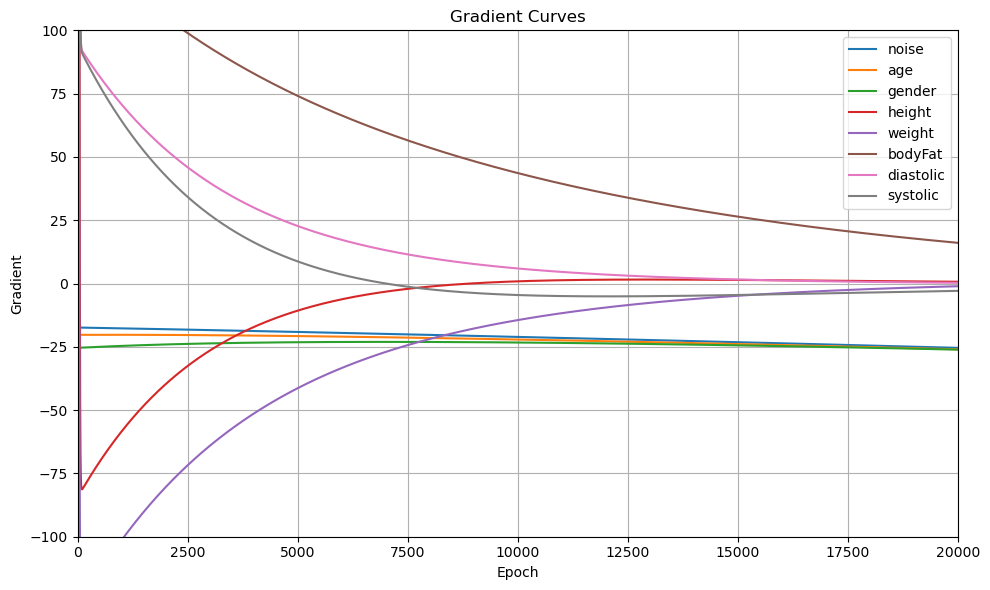

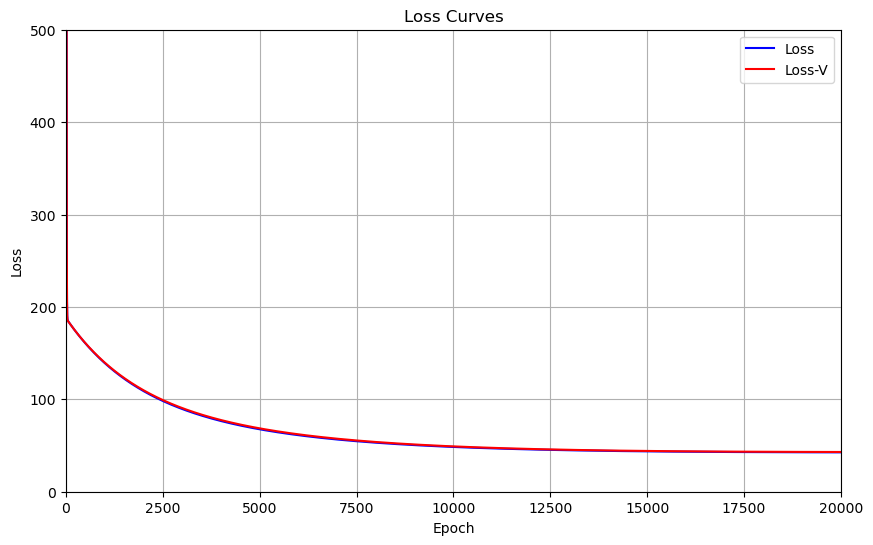

In [223]:
gradient = np.array(gradient)
plt.figure(figsize=(10, 6))
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

g_features = ["noise","age","gender","height","weight","bodyFat","diastolic","systolic"]
plt.plot(gradient, label=g_features)
plt.xlabel('Epoch')
plt.ylabel('Gradient')
plt.title('Gradient Curves')
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.ylim(-100,100)
plt.xlim(0,20000)
# ax1.plot(gradient[:,0:7], label='Gradient', color='red')
# ax1.set_xlabel('Epoch')
# ax1.set_ylabel('Gradient')
# ax1.set_title('Gradient Curve')
# ax1.legend()
# ax1.grid(True)
# ax1.set_ylim(-50,50)
#ax1.set_xlim(0,50)
# Show the plots

# ax2.plot(gradient[:,7:], label='Gradient', color='red')
# ax2.set_xlabel('Epoch')
# ax2.set_ylabel('Gradient')
# ax2.set_title('Gradient Curve')
# ax2.legend()
# ax2.grid(True)
# ax2.set_ylim(-50,50)
# ax2.set_xlim(0,50)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the first loss curve
plt.plot(loss, label='Loss', color='blue')

# Plot the second loss curve
plt.plot(lossv, label='Loss-V', color='red')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.ylim(0,500)
plt.xlim(0,20000)

# Show the plot
plt.show()

In [224]:
print(f"training : {Training.shape}")

training : (7046, 8)


In [225]:
X_ = np.ones(Training.shape[0])
print(f"X_:{X_.shape}")
print(f"X_:{X_[0]}")
X_ = np.column_stack((X_,Training[:,:-1]))
print(f"X_:{X_.shape}")
print(f"X_:{X_[0]}")

X_:(7046,)
X_:1.0
X_:(7046, 8)
X_:[  1.          0.7457246   1.        175.1        66.5        17.3
  85.        125.       ]
